<a href="https://colab.research.google.com/github/keerthanakkumar/Codsoft-internship/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREDIT CARD FRAUD DETECTION**

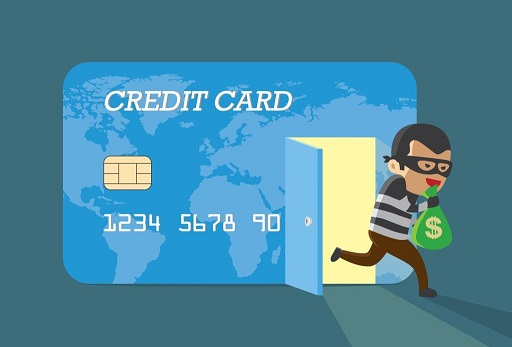

**About the Dataset**

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

**trans_date_trans_time:** The date and time when the transaction occurred. This is usually in the format 'YYYY-MM-DD HH:MM:SS'.

**cc_num:** The credit card number used for the transaction

**merchant:** A merchant refers to the business or individual that sells goods or services and accepts credit card payments from customers.

**category:** The category or type of the merchant, such as "grocery", "electronics", "clothing", etc. This helps classify the transaction.

**amt:** The amount of money involved in the transaction.

**first:** The first name of the cardholder.

**last:** The last name of the cardholder.

**gender:** The gender of the cardholder, typically represented as 'M' for male and 'F' for female.

**street:** The street address of the cardholder.

**city:** The city where the cardholder resides.

**state:** The state where the cardholder resides.

**zip:** The zip code of the cardholder’s address.

**lat:** The latitude coordinate of the cardholder's address.

**long:** The longitude coordinate of the cardholder's address.

**city_pop:** The population of the city where the cardholder resides. This can be used to understand the demographic context.

**job:** The occupation of the cardholder. This might be used for socioeconomic analysis.

**dob:** The date of birth of the cardholder. This can be used to derive the age of the cardholder at the time of the transaction.

**trans_num:** The unique transaction number or identifier for each transaction.

**unix_time:** The Unix timestamp of the transaction, which is the number of seconds since January 1, 1970 (the Unix epoch).

**merch_lat:** The latitude coordinate of the merchant's location where the transaction took place.

**merch_long:** The longitude coordinate of the merchant's location where the transaction took place.

**is_fraud:** A binary indicator of whether the transaction was fraudulent (1 for fraud and 0 for legitimate transactions).


## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading train dataset
train = pd.read_csv('/content/fraudTrain.csv')
# loading test dataset
test = pd.read_csv('/content/fraudTest.csv')

## EXPLORATORY DATA ANALYSIS

In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [4]:
train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
27254,27254,2019-01-16 16:11:37,4878364946692291,fraud_Bauch-Raynor,grocery_pos,311.01,Tina,Alvarez,F,1976 Tyler Underpass,...,42.4483,-95.1726,885.0,"Pilot, airline",1949-08-14,95bae2e173f59aa359e59d50b85c81c6,1.326730e+09,42.088057,-95.207560,1.0
27255,27255,2019-01-16 16:11:38,180084695172649,fraud_Botsford and Sons,home,75.14,Holly,Mann,F,7644 Joseph Fields,...,39.3036,-89.2853,3458.0,Building surveyor,1985-12-08,31ff7fb365a6425ee51c35eb39e877d5,1.326730e+09,38.993834,-89.709933,0.0
27256,27256,2019-01-16 16:11:59,38057513087029,fraud_Kozey-Kuhlman,personal_care,21.29,Marissa,Clark,F,2677 Byrd Village Suite 035,...,37.3304,-121.7913,973849.0,Geoscientist,1997-01-18,bf495ee334f318f18552e16a9c750ae6,1.326730e+09,37.871844,-122.029575,0.0
27257,27257,2019-01-16 16:12:26,180084576295055,fraud_Windler LLC,kids_pets,40.45,David,Kirby,M,133 Alyssa Plains,...,28.7724,-96.4793,911.0,Archaeologist,1970-01-18,8c7acaafddc3b450418ecaa467f30cc5,1.326730e+09,28.964929,-97.250660,0.0
27258,27258,2019-01-16 16:13:19,30248898834493,fraud_Gibson-Deckow,entertainment,67.13,Michael,Rodriguez,M,172 P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(train.shape)
print(test.shape)

(27259, 23)
(31124, 23)


In [6]:
print(train.size)
print(test.size)

626957
715852


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27259 entries, 0 to 27258
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27259 non-null  int64  
 1   trans_date_trans_time  27259 non-null  object 
 2   cc_num                 27259 non-null  int64  
 3   merchant               27259 non-null  object 
 4   category               27259 non-null  object 
 5   amt                    27259 non-null  float64
 6   first                  27259 non-null  object 
 7   last                   27259 non-null  object 
 8   gender                 27259 non-null  object 
 9   street                 27259 non-null  object 
 10  city                   27258 non-null  object 
 11  state                  27258 non-null  object 
 12  zip                    27258 non-null  float64
 13  lat                    27258 non-null  float64
 14  long                   27258 non-null  float64
 15  ci

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31124 entries, 0 to 31123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31124 non-null  int64  
 1   trans_date_trans_time  31124 non-null  object 
 2   cc_num                 31123 non-null  float64
 3   merchant               31123 non-null  object 
 4   category               31123 non-null  object 
 5   amt                    31123 non-null  float64
 6   first                  31123 non-null  object 
 7   last                   31123 non-null  object 
 8   gender                 31123 non-null  object 
 9   street                 31123 non-null  object 
 10  city                   31123 non-null  object 
 11  state                  31123 non-null  object 
 12  zip                    31123 non-null  float64
 13  lat                    31123 non-null  float64
 14  long                   31123 non-null  float64
 15  ci

In [9]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,27259.00000,2.725900e+04,27259.000000,27258.000000,27258.000000,27258.000000,2.725800e+04,2.725800e+04,27258.000000,27258.000000,27258.000000
mean,13629.00000,4.203488e+17,71.834406,48732.303581,38.525900,-90.224295,9.005962e+04,1.326075e+09,38.525442,-90.225811,0.009355
std,7869.13983,1.313623e+18,151.848187,26978.693903,5.097014,13.927149,2.988129e+05,3.959763e+05,5.124933,13.946210,0.096270
min,0.00000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,6814.50000,1.800462e+14,9.680000,25526.000000,34.690200,-96.809400,7.540000e+02,1.325766e+09,34.785420,-96.950790,0.000000
50%,13629.00000,3.519233e+15,47.890000,48088.000000,39.339100,-87.476900,2.501000e+03,1.326043e+09,39.334418,-87.430602,0.000000
75%,20443.50000,4.651007e+15,83.600000,72042.000000,41.846700,-80.124800,2.112500e+04,1.326453e+09,41.899086,-80.148617,0.000000
max,27258.00000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326730e+09,66.659242,-66.967742,1.000000


In [10]:
test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,31124.000000,3.112300e+04,31123.000000,31123.000000,31123.000000,31123.000000,3.112300e+04,3.112300e+04,31123.000000,31123.000000,31123.000000
mean,15561.500000,4.091678e+17,69.186416,48550.990264,38.540180,-90.065315,9.013189e+04,1.372249e+09,38.537130,-90.067105,0.004338
std,8984.869226,1.297193e+18,132.903222,26774.993828,5.054688,13.565826,3.043407e+05,2.675250e+05,5.090761,13.576189,0.065719
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.584303,0.000000
25%,7780.750000,1.800429e+14,9.580000,25832.000000,34.668900,-96.727000,7.590000e+02,1.371992e+09,34.756136,-96.764038,0.000000
50%,15561.500000,3.518669e+15,46.610000,48088.000000,39.371600,-87.456900,2.457000e+03,1.372270e+09,39.377332,-87.373346,0.000000
75%,23342.250000,4.610065e+15,82.825000,71960.000000,42.015800,-80.128400,2.047800e+04,1.372497e+09,41.974294,-80.204000,0.000000
max,31123.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372694e+09,66.669356,-66.955602,1.000000


In [11]:
# check missing values in training data
train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [12]:
# clear missing values of train data
train = train.dropna()

In [13]:
# check missing values in test data
test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [14]:
# clear missing values of test data
test = test.dropna()

In [15]:
# drop unnecessary column
train.drop(['Unnamed: 0'], axis =1, inplace =True)
test.drop(['Unnamed: 0'], axis =1, inplace =True)

In [16]:
# change data type
train['is_fraud'] = train['is_fraud'].astype(int)
test['is_fraud'] = test['is_fraud'].astype(int)

# Convert 'trans_date_trans_time' to datetime
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])

# Convert dob to date time format
train['dob'] = pd.to_datetime(train['dob'])
test['dob'] = pd.to_datetime(test['dob'])

In [17]:
# distribution of fraudulent and legitimate transaction
train_transaction = train['is_fraud'].value_counts()
test_transaction = test['is_fraud'].value_counts()
print('Transaction in training data',train_transaction)
print('Transaction in testing data',test_transaction)

Transaction in training data is_fraud
0    27003
1      255
Name: count, dtype: int64
Transaction in testing data is_fraud
0    30988
1      135
Name: count, dtype: int64


In [18]:
# mean of amount in both transaction
train.groupby('is_fraud') ['amt'].mean()

is_fraud
0     67.699360
1    509.729843
Name: amt, dtype: float64

Maximum amount transaction has happened in fraudulent transaction

In [19]:
# seperate the data
legit = train[train['is_fraud'] == 0]
fraud = train[train['is_fraud'] == 1]

In [20]:
print(legit.shape)
print(fraud.shape)

(27003, 22)
(255, 22)


We can understand that fraud transaction is comparitively less than legit transaction

## DATA VISUALIZATION

In [21]:
# Pie chart showing legit and fraud transaction distribution

train_values = train_transaction.values
test_values = test_transaction.values
labels = ['Legit', 'Fraud']
colors = ['red', 'yellow']

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Train Data Pie Chart
fig.add_trace(go.Pie(labels=labels,
                     values=train_values,
                     hole=.3,
                     marker=dict(colors=colors, line=dict(color='white', width=0.1))),
              row=1, col=1)

# Test Data Pie Chart
fig.add_trace(go.Pie(labels=labels,
                     values=test_values,
                     hole=.3,
                     marker=dict(colors=colors, line=dict(color='white', width=0.1))),
              row=1, col=2)

# Layout
fig.update_layout(
    title_text="Fraud Distribution in Train and Test Data",
    annotations=[dict(text='Train Data', x=0.175, y=0.5, font_size=19, showarrow=False),
                 dict(text='Test Data', x=0.825, y=0.5, font_size=20, showarrow=False)],
    paper_bgcolor="black",
    font_color="white"
)

# Show the figure
fig.show()

In [22]:
print('Legitimate transaction:', round(train['is_fraud'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Fraudulent transaction:', round(train['is_fraud'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

Legitimate transaction: 99.06 % of the dataset
Fraudulent transaction: 0.94 % of the dataset


Here we can understand that our dataset is highly unbalanced as:

- number of legitimate transaction(0) is more than 99% and fraudulent transaction(1) is less than 1%

- this way the machine reads all transaction as legitimate

Hence, we have to balance the data

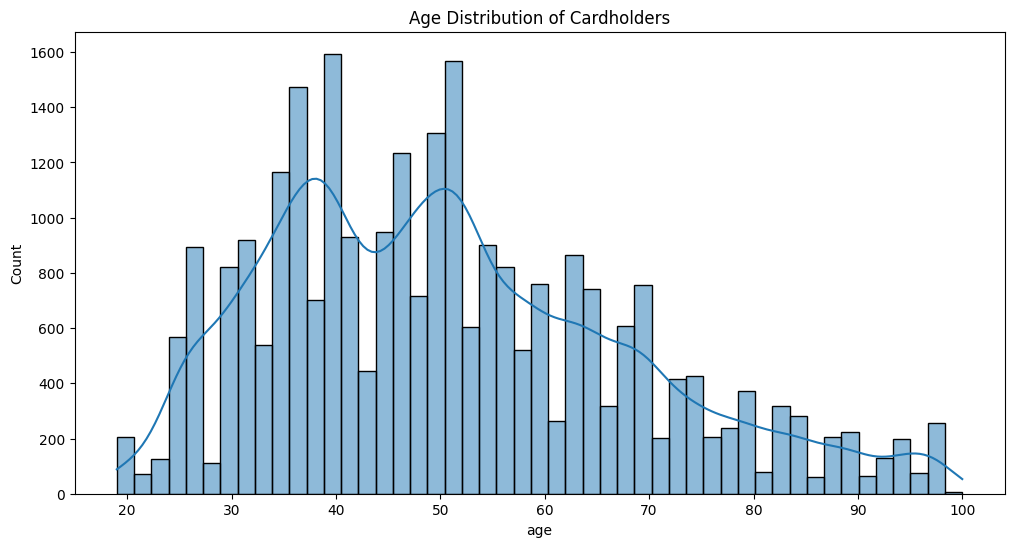

In [23]:
# Calculate the age in days
age_days = pd.to_datetime('today') - train['dob']

# Convert to years
age = round(age_days.dt.total_seconds() / (365 * 24 * 60 * 60)).astype(int)

# Plot age distribution for fraud transaction
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud, x=age,kde=True)
plt.title('Age Distribution of Cardholders')
plt.xlabel('age')
plt.show()

In [24]:
fraud['age']= age
fraud.groupby('age')['is_fraud'].count().sort_values(ascending=False)

age
36    22
64    15
85    15
48    14
52    14
23    13
69    13
31    12
83    12
78    11
74    11
89    11
25    11
50    11
34    11
68    10
51    10
53    10
67     9
42     7
27     6
70     5
75     2
Name: is_fraud, dtype: int64

Maximum Fraudulant transactions, which is 188, is done by people of age 54.

Whereas minimum transactions 9, is done by people of age 88.

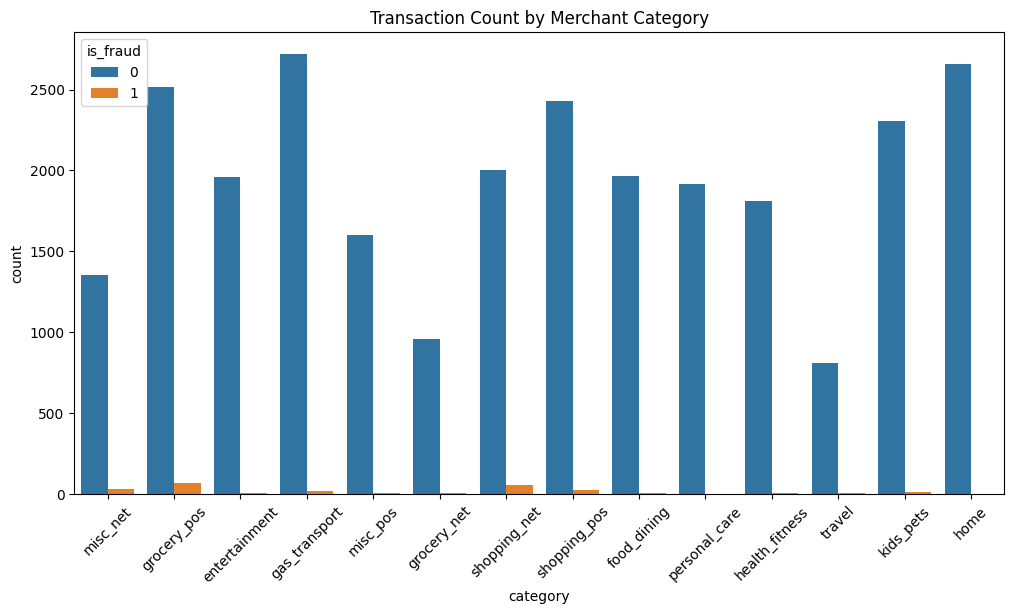

In [26]:
# Plot transaction count by merchant category
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='category', hue='is_fraud')
plt.title('Transaction Count by Merchant Category')
plt.xticks(rotation=45)
plt.show()

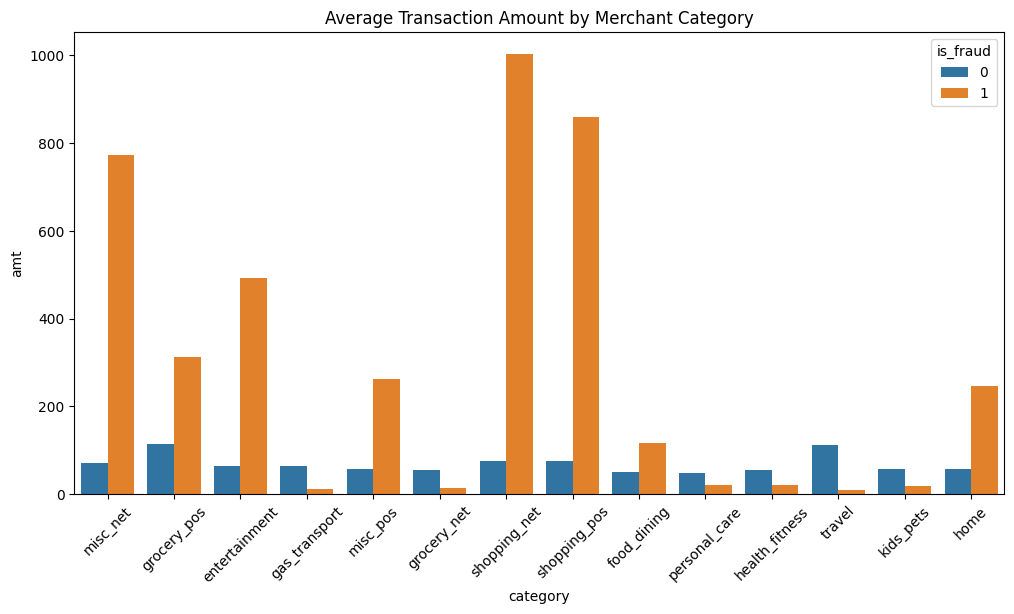

In [27]:
# Plot average transaction amount by merchant category
plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='category', y='amt', hue='is_fraud', ci=None)
plt.title('Average Transaction Amount by Merchant Category')
plt.xticks(rotation=45)
plt.show()

## FEATURE ENGINEERING

In [28]:
# encoding train data
encode = LabelEncoder()
train['merchant'] = encode.fit_transform(train['merchant'])
train['category'] = encode.fit_transform(train['category'])
train['job'] = encode.fit_transform(train['job'])
train['city'] = encode.fit_transform(train['city'])
train['gender'] = encode.fit_transform(train['gender'])
train['first'] = encode.fit_transform(train['first'])
train['last'] = encode.fit_transform(train['last'])
train['street'] = encode.fit_transform(train['street'])
train['state'] = encode.fit_transform(train['state'])
train['trans_num'] = encode.fit_transform(train['trans_num'])

In [29]:
# encoding test data
test['merchant'] = encode.fit_transform(test['merchant'])
test['category'] = encode.fit_transform(test['category'])
test['job'] = encode.fit_transform(test['job'])
test['city'] = encode.fit_transform(test['city'])
test['gender'] = encode.fit_transform(test['gender'])
test['first'] = encode.fit_transform(test['first'])
test['last'] = encode.fit_transform(test['last'])
test['street'] = encode.fit_transform(test['street'])
test['state'] = encode.fit_transform(test['state'])
test['trans_num'] = encode.fit_transform(test['trans_num'])

In [30]:
# correlation
corr = train.corr()
corr

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
trans_date_trans_time,1.000000,-0.001927,0.007244,0.000182,0.017210,-0.005543,0.011216,0.008638,-0.007190,0.010834,...,-0.002593,0.021612,-0.002080,0.002824,0.023184,-0.003530,1.000000,-0.003149,0.020999,0.044185
cc_num,-0.001927,1.000000,0.010961,0.003122,-0.010614,-0.025129,0.017037,-0.001904,0.048816,0.053950,...,-0.063553,-0.054044,-0.005200,0.027828,-0.004360,-0.001616,-0.001927,-0.063398,-0.054388,-0.016015
merchant,0.007244,0.010961,1.000000,0.025027,-0.007275,0.005023,0.013846,0.003642,-0.001894,-0.005440,...,0.000164,0.001544,-0.000394,-0.004012,-0.002959,0.009470,0.007244,0.000954,0.001813,-0.006774
category,0.000182,0.003122,0.025027,1.000000,0.040732,0.000952,-0.001593,-0.020056,0.000687,0.013108,...,-0.001989,-0.001988,0.019308,-0.000842,-0.003129,0.004554,0.000182,-0.001713,-0.002218,0.017276
amt,0.017210,-0.010614,-0.007275,0.040732,1.000000,-0.009568,-0.000683,0.003428,-0.000579,0.000593,...,0.020660,0.008362,0.007571,-0.001505,0.002252,0.001919,0.017210,0.020542,0.008596,0.280237
first,-0.005543,-0.025129,0.005023,0.000952,-0.009568,1.000000,-0.054699,0.013506,-0.035472,-0.010452,...,0.139528,-0.029336,-0.070659,-0.051405,-0.001641,0.007662,-0.005543,0.138954,-0.029130,-0.012080
last,0.011216,0.017037,0.013846,-0.001593,-0.000683,-0.054699,1.000000,0.046378,0.014166,0.017784,...,-0.038990,-0.012829,-0.006865,-0.022859,-0.007133,0.004379,0.011216,-0.039808,-0.013540,0.010312
gender,0.008638,-0.001904,0.003642,-0.020056,0.003428,0.013506,0.046378,1.000000,0.035020,0.020034,...,0.052614,0.056542,-0.028838,-0.078134,-0.012268,-0.004102,0.008638,0.052350,0.056465,0.004439
street,-0.007190,0.048816,-0.001894,0.000687,-0.000579,-0.035472,0.014166,0.035020,1.000000,-0.020948,...,-0.009099,0.056528,-0.006894,-0.027034,-0.028825,0.003995,-0.007190,-0.009206,0.056757,-0.000537
city,0.010834,0.053950,-0.005440,0.013108,0.000593,-0.010452,0.017784,0.020034,-0.020948,1.000000,...,-0.038099,-0.066508,0.040941,0.012881,0.016998,0.002198,0.010834,-0.036382,-0.066784,0.014633


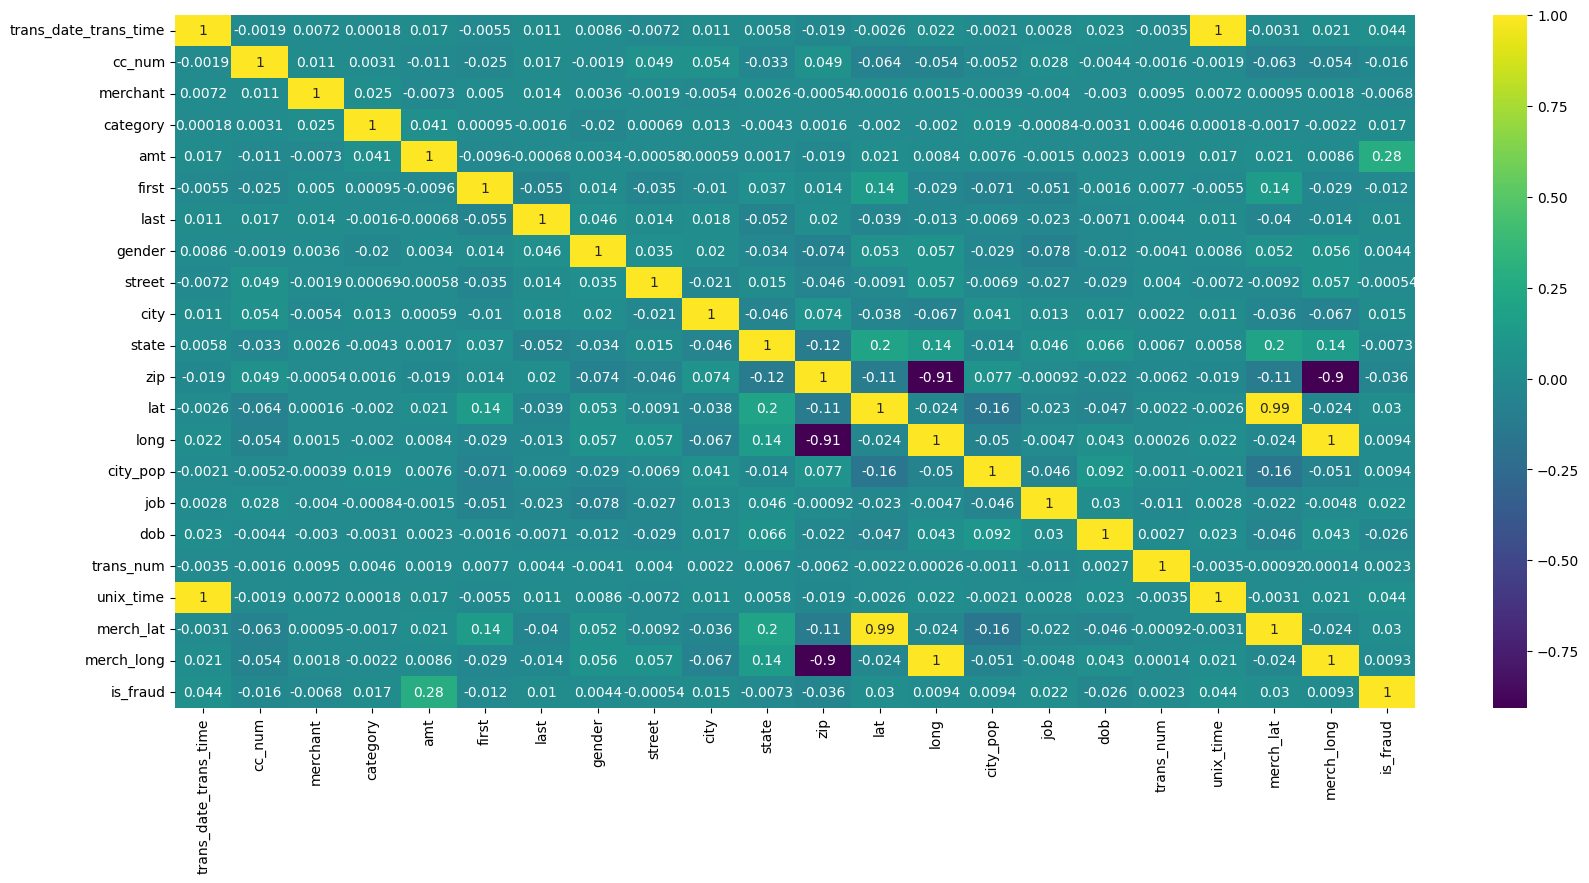

In [31]:
# heatmap
plt.figure(figsize=(20,9))
sns.heatmap(corr, cmap= 'viridis', annot = True)
plt.show()

In [32]:
# Extract features from 'trans_date_trans_time'
train['trans_year'] = train['trans_date_trans_time'].dt.year
train['trans_month'] = train['trans_date_trans_time'].dt.month
train['trans_day'] = train['trans_date_trans_time'].dt.day
train['trans_hour'] = train['trans_date_trans_time'].dt.hour

test['trans_year'] = test['trans_date_trans_time'].dt.year
test['trans_month'] = test['trans_date_trans_time'].dt.month
test['trans_day'] = test['trans_date_trans_time'].dt.day
test['trans_hour'] = test['trans_date_trans_time'].dt.hour

In [33]:
# Drop the original datetime column
train.drop(['trans_date_trans_time'], axis=1, inplace=True)
test.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [34]:
# Drop unnecessary columns
columns_to_drop = [ 'city_pop', 'first', 'last', 'street', 'zip', 'unix_time', 'dob', 'lat', 'long', 'merch_lat', 'merch_long','trans_num']
train.drop(columns=columns_to_drop, axis=1, inplace=True)
test.drop(columns=columns_to_drop, axis=1, inplace=True)

Train Test split

In [35]:
x_train = train.drop(['is_fraud'],axis=1)
y_train = train['is_fraud']

x_test = test.drop(['is_fraud'],axis=1)
y_test = test['is_fraud']

In [36]:
print(x_train.shape)
print(y_train.shape)

(27258, 12)
(27258,)


In [37]:
print(x_test.shape)
print(y_test.shape)

(31123, 12)
(31123,)


In [38]:
# Balance data
smote = SMOTE(random_state=42)
x_train,y_train = smote.fit_resample(x_train,y_train)
y_train.value_counts()

is_fraud
0    27003
1    27003
Name: count, dtype: int64

In [39]:
# Scaling data
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## MODEL CREATION & PERFOMANCE EVALUATION



In [41]:
# Train models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"\n{name} Model Evaluation:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print()


Logistic Regression Model Evaluation:
Confusion Matrix:
[[11807 19181]
 [    9   126]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55     30988
           1       0.01      0.93      0.01       135

    accuracy                           0.38     31123
   macro avg       0.50      0.66      0.28     31123
weighted avg       0.99      0.38      0.55     31123

Accuracy Score: 0.38341419528965714


Decision Tree Model Evaluation:
Confusion Matrix:
[[30706   282]
 [   76    59]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30988
           1       0.17      0.44      0.25       135

    accuracy                           0.99     31123
   macro avg       0.59      0.71      0.62     31123
weighted avg       0.99      0.99      0.99     31123

Accuracy Score: 0.9884972528355236


Random Forest Model Evaluation:
Confusion Matrix:
[[3089

From this we can infer that best accuracy score is obtained from Random Forest Classifier.